In [1]:
# Portfolio Allocation

import pandas as pd
import quandl
quandl.ApiConfig.api_key = ""

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)


In [3]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [4]:
aapl.iloc[0]

Adj. Close    52.848787
Name: 2012-01-03 00:00:00, dtype: float64

In [5]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [6]:
# Calculate a cumulative daily return (normalized return)

# for every stock dataframe, create a new column, take adjusted close column and divide by INITIAL PRICE
# first entry should be 1.0 (or 100%)
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normalized Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']
    


In [7]:
#expect first Normalized Return to be 1.0
aapl

,Adj. Close,Normalized Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533
...,...,...
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034


In [8]:
# how to allocate?
# should sum up to 1.0
# make a list of tuples [1258 rows x 2 columns], 0.3)
list(zip((aapl, cisco, ibm, amzn),[0.3, 0.2, 0.4, 0.1]))

[(            Adj. Close  Normalized Return
  Date                                     
  2012-01-03   52.848787           1.000000
  2012-01-04   53.132802           1.005374
  2012-01-05   53.722681           1.016536
  2012-01-06   54.284287           1.027162
  2012-01-09   54.198183           1.025533
  ...                ...                ...
  2016-12-23  115.080808           2.177549
  2016-12-27  115.811668           2.191378
  2016-12-28  115.317843           2.182034
  2016-12-29  115.288214           2.181473
  2016-12-30  114.389454           2.164467
  
  [1258 rows x 2 columns], 0.3), (            Adj. Close  Normalized Return
  Date                                     
  2012-01-03   15.617341           1.000000
  2012-01-04   15.919125           1.019324
  2012-01-05   15.860445           1.015566
  2012-01-06   15.801764           1.011809
  2012-01-09   15.902359           1.018250
  ...                ...                ...
  2016-12-23   29.475311           1.8873

In [9]:
# sample allocation
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm
for stock_df, alloc in zip((aapl, cisco, ibm, amzn),[0.3, 0.2, 0.4, 0.1]):
    stock_df['Allocation'] = stock_df['Normalized Return']*alloc

# will have 3 columns: Adj Close, Normalized Close, Allocation = Normalized Return * alloc
# first frame would be Normalized Return = 1.0 and Allocation 0.3*1.0 = 0.3
aapl.head()

,Adj. Close,Normalized Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [10]:
# Allocate some money
# ex) 30% of 1 million dollars = 300k
# for every stock dataframe, create a column called position value
# the position value is Allocation * Portfolio Value

for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000
    
aapl.head()

,Adj. Close,Normalized Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [11]:
# Now create super dataframe for total portfolio value 

all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
# axis = 1 concat to concat columns -- if you forget then it just creates more rows
portfolio_val = pd.concat(all_pos_vals, axis=1)

portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [12]:
# Add the column headers with positions
portfolio_val.columns = ['AAPL Posn','CISCO Posn','IBM Posn','AMZN Posn']

# Create a Total Position Column (so axis = 1)
portfolio_val['Total Posn'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Posn,CISCO Posn,IBM Posn,AMZN Posn,Total Posn
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


Text(0.5, 1.0, 'Total Portfolio Value')

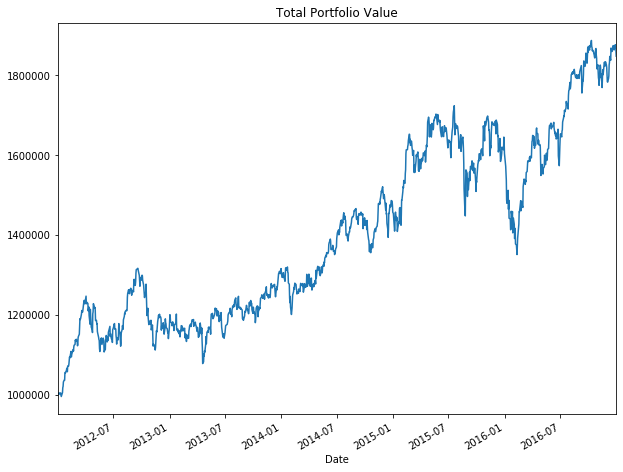

In [13]:
# Plot total portfolio value
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total Posn'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

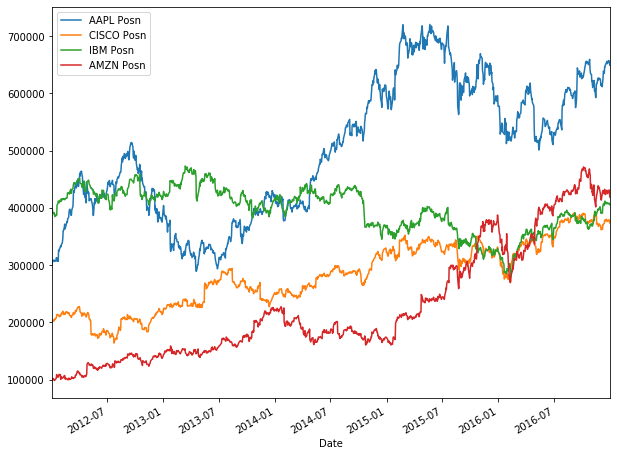

In [14]:
# See each contributor in a plot
# Drop the total so it looks better (remember it is a column so it is axis=1)
portfolio_val.drop('Total Posn', axis=1).plot(figsize=(10,8))

In [15]:
# Portfolio Statistics
portfolio_val['Daily Return'] = portfolio_val['Total Posn'].pct_change(1)
portfolio_val['Daily Return'].mean()
portfolio_val['Daily Return'].std()
portfolio_val.head()

,AAPL Posn,CISCO Posn,IBM Posn,AMZN Posn,Total Posn,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


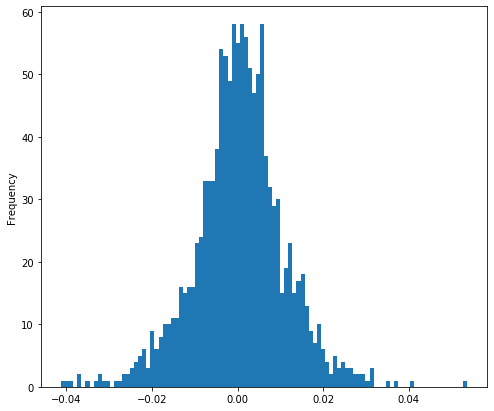

In [16]:
# Plot it in a histogram
portfolio_val['Daily Return'].plot(kind='hist', bins=100,figsize=(8,7))

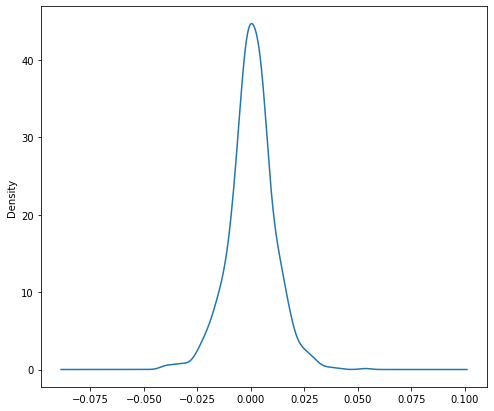

In [17]:
# Plot it in a kde
portfolio_val['Daily Return'].plot(kind='kde', figsize=(8,7))

In [18]:
# Overall Cumulative Return (not daily cumulative return)
cumulative_return = (portfolio_val['Total Posn'][-1]/portfolio_val['Total Posn'][0] - 1)
cumulative_return

0.8474285181665544

In [19]:
# current portfolio value
portfolio_val['Total Posn'][-1]

1847428.5181665544

In [20]:
# calculate sharpe ratio
RiskFreeRate = 0.01/252
SR = (portfolio_val['Daily Return'].mean() - RiskFreeRate) / portfolio_val['Daily Return'].std()
SR

0.047741937290093864

In [21]:
# Annualized Sharpe Ratio
# annualize the SR from the daily rate
ASR = (252**0.5) * SR
ASR
# a good sharpe ratio > 1 is considered good depending on client
# a ratio > 2 is great and a ratio > 3 is excellent
# level of risk taking corresponding to additional return

0.7578797590681758

In [22]:
# Portfolio Optimization
# Guess and check a bunch of random allocation sto get the best sharpe ratio
# Monte Carlo Simulation
# We will use scipy to optimize: minimize the negative sharpe ratio (minimizer tool)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

# Grabbing a bunch of tech stocks for our portfolio
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

In [23]:
# Join columns together
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [24]:
# arithmetic return
print(stocks.pct_change(1).mean())


aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64


In [25]:
# correlation analysis
stocks.pct_change(1).corr()


,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [26]:
# log returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


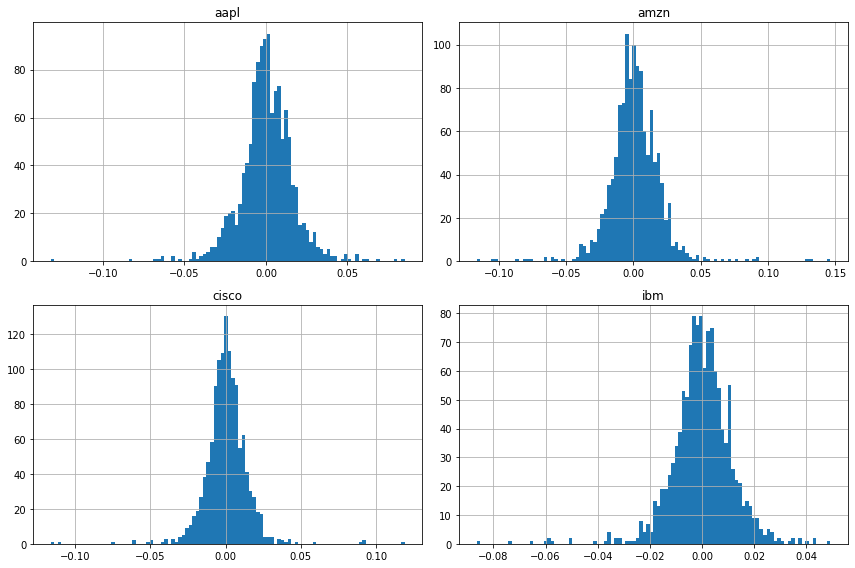

In [27]:
# log return histogram
log_ret.hist(bins = 100, figsize=(12,8))
plt.tight_layout()

In [28]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [29]:
# compare the pairwise covariance
# check the wikipedia article to see what they represent

# daily
log_ret.cov()

# daily to annually
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [30]:
# Basic Sharpe Ratio Calculation

# to get same random number each time
np.random.seed(101)

# remind us which stocks are there
print(stocks.columns)

# Weights - Generate 4 random weights
weights = np.array(np.random.random(4))
print("Random Weights")
print(weights)
# Weights - Normalization technique to sum to 1
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# Expected Portfolio Return, adjust for risk free rate
print('Risk Free Rate')
rf_rate = 0.0   # Annualized risk free rate
print(rf_rate)

# Expected Portfolio Return = take log returns, then average it, then, x weights x 252 trading days, then sum it up
print('Expected Portfolio Return')
exp_ret = np.sum( (log_ret.mean() * weights) * 252)  - rf_rate
print(exp_ret)


# Expected volatility (denominator of sharpe ratio) = Calculate Variance/StdDev
# First take covariance of the log returns, annualize by multiply by 252
# Then dot product the covariance with the weights
# Then dot product again with the weights transpose
# Then square root the whole thing
# Use numpy dot products to run faster (can re-write to run slower so use linear algebra speed complex code)
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
# The greater the Sharpe ratio, the more attractive the risk-adjusted return is, used to compare investment strategies
# Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return
# 1) Assumption that returns are normally distributed, but in real market scenarios, 
# the distribution might suffer from kurtosis and fatter tails, which decreases the relevance of its use
# 2) Drawback of Sharpe ratio is that it cannot distinguish between upside and downside and focuses on volatility 
# but not its direction
# 3) Sharpe ratio is backward-looking and accounts for historical returns & volatility, can be manipulated on lookback window
# 4) In future, look at Sortino ratio for downside only
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Risk Free Rate
0.0
Expected Portfolio Return
0.155992720496325
Expected Volatility
0.18502649565908943
Sharpe Ratio
0.8430831483926549


In [31]:
# For Loop Sharpe Ratio (No Print Statements)
# Basic Sharpe Ratio Calculation

# to get same random number each time
np.random.seed(101)

# Number of portfolios
num_ports = 5000

# Save results through each iteration
all_weights = np.zeros((num_ports,len(stocks.columns)))  # 2Darray to hold all the weights (rows=num_ports, columns=num_stocks)
ret_arr = np.zeros(num_ports)                            # array to hold all the returns, vols, SRs
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# For loop
for ind in range(num_ports):

    # Weights
    weights = np.array(np.random.random(4))
    # Normalization technique to sum to 1
    weights = weights/np.sum(weights)
    # For Loop - Save weights 
    all_weights[ind,:] = weights

    # Expected Portfolio Return, adjust for risk free rate
    rf_rate = 0.0   # Annualized risk free rate

    # Expected Portfolio Return = take log returns, then average it, then, x weights x 252 trading days, then sum it up
    # exp_ret = np.sum( (log_ret.mean() * weights) * 252)  - rf_rate
    # for loop saving:
    ret_arr[ind] = np.sum( (log_ret.mean() * weights) * 252)  - rf_rate

    # Expected volatility (denominator of sharpe ratio) = Calculate Variance/StdDev
    # First take covariance of the log returns, annualize by multiply by 252
    # Then dot product the covariance with the weights
    # Then dot product again with the weights transpose
    # Then square root the whole thing
    # Use numpy dot products to run faster (can re-write to run slower so use linear algebra speed complex code)
    # exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio
    # The greater the Sharpe ratio, the more attractive the risk-adjusted return is, used to compare investment strategies
    # Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return
    # 1) Assumption that returns are normally distributed, but in real market scenarios, 
    # the distribution might suffer from kurtosis and fatter tails, which decreases the relevance of its use
    # 2) Drawback of Sharpe ratio is that it cannot distinguish between upside and downside and focuses on volatility 
    # but not its direction
    # 3) Sharpe ratio is backward-looking and accounts for historical returns & volatility, can be manipulated on lookback window
    # 4) In future, look at Sortino ratio for downside only
    # SR = exp_ret/exp_vol
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    

In [32]:
num_ports = 5000
all_weights_test = np.zeros((num_ports,len(stocks.columns))) 
all_weights_test

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
# Highest sharpe ratio is 
sharpe_arr.max()

1.0303260551271305

In [34]:
# Location of highest sharpe ratio
sharpe_arr.argmax() # for example portfolio it is row 1420

# So the weight would be
max_sr_location = sharpe_arr.argmax()  # 1420

# all_weights[1420,:]
all_weights[max_sr_location,:]
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

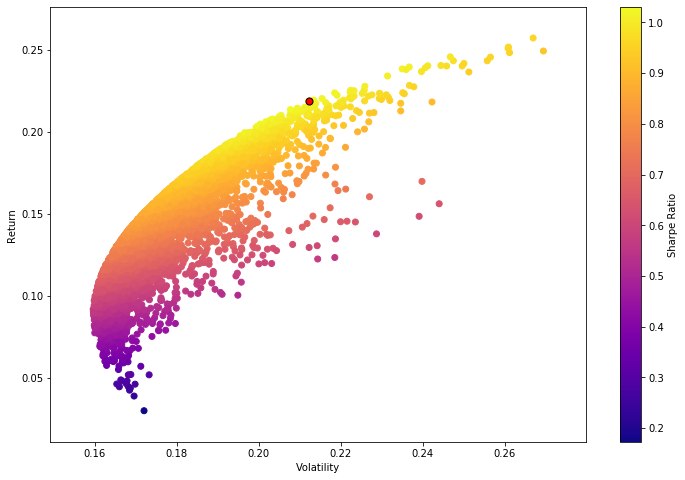

In [35]:
# Scatter plot out the 
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr,c=sharpe_arr,cmap='plasma')  # cmap='plasma'
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Scatter plot the max point, red dot
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [36]:
# Optimization Function
# Previously random
# Use scipy to help

# log returns
log_ret = np.log(stocks/stocks.shift(1))

# function 1
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])


In [37]:
from scipy.optimize import minimize

# for help function documentation:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [38]:
# Constraints for Minimizer
# Constraints mean less things to check

# This function is a helper function for scipy minimizer (to calculate the negative sharpe ratio)
def neg_sharpe(weights):
    # get_ret_vol_sr(weights) = np.array([pret,vol,sr])
    return get_ret_vol_sr(weights)[2]*-1


# This function is a constraint function to check the sum of the weights = 1
# return 0 if sum of the weights is 1
def check_sum(weights):
    return np.sum(weights) - 1

# Other Constraints
constraint = ({'type':'eq','fun':check_sum})   # tuple with dictionary inside: check_sum returns 0 if meets reqt
bounds = ((0,1),(0,1),(0,1),(0,1))             # tuple of tuples repeated 4 times: the bounds of each weight to be 0 to 1
initial_guess = [0.25,0.25,0.25,0.25]          # list: initial weights

In [39]:
type(constraint)

dict

In [40]:
# Minimizer Function
# minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, 
#          bounds=None, constraints=(), tol=None, callback=None, options=None)
# fun (function to minimize) = neg_sharpe
# x0 = initial_guess
# method = different types of solver algos = 'SLSQP' recommended for basic tasks = Sequential Least SQuares Programming
optimize_results = minimize(neg_sharpe,initial_guess, method = 'SLSQP',bounds=bounds,constraints=constraint)
optimize_results

     fun: -1.0307168703349403
     jac: array([ 5.64306974e-05,  4.18424606e-05,  3.39921713e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418982, 0.        , 0.5295204 ])

In [41]:
# Get Optimal Results

# access the "optimize function" results: success or failure?
print('Success: ' + str(optimize_results.success))
# actual values if successful (these are weights)
print('Weights: ' + str(optimize_results.x))

# put weights into function to get Exp Return, Exp Volatility, Sharpe Ratio
print('Results (Exp Return, Exp Volatility, SR): ' + str(get_ret_vol_sr(optimize_results.x)))

# Sharpe Ratio within the Result Set
# seems like maximium sharpe ratio is 1.03 similar to the above which used 5000 random MC guesses (for more securities, optimization is better than MC)
get_ret_vol_sr(optimize_results.x)[2]

Success: True
Weights: [0.26628977 0.20418982 0.         0.5295204 ]
Results (Exp Return, Exp Volatility, SR): [0.21885915 0.21233683 1.03071687]


1.0307168703349403

In [42]:
# Calculate efficient frontier
# 1) "get highest return for each level of risk" 
# 2) OR "lowest risk possible for given level of return"
# 3) best y value for each x value


# y values storage, 100 points on the 
# look up at the visualization to see which x min and x max (vol min and vol max)
# vol min looks like 0 and vol max looks like 0.3
frontier_y = np.linspace(0, 0.3, 100)

# function to return volatility
# give weights
# return the volatility [1]
# comment we do not need to inverse the volatility, unlike the sharpe ratio 
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]


frontier_volatility = []

# for every possible return on the y axis, what possible x
# eq means equation
# first constraint: all sums have to equal 1 (returns 0)
# second constraint: get the returns and subtract the possible return (that's the max possible return, returns 0)
for possible_return in frontier_y:
    constraint = ({'type':'eq','fun':check_sum},
                  {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, initial_guess, method='SLSQP',bounds=bounds, constraints=constraint)
    # fun is function value from result
    frontier_volatility.append(result['fun'])

# takes 25 seconds to run

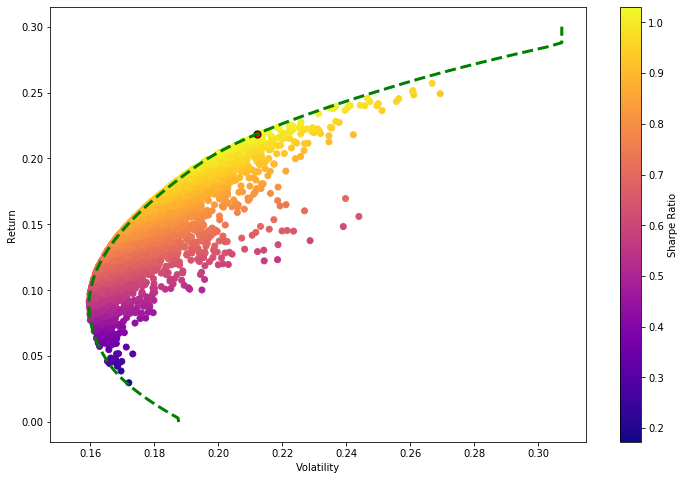

In [43]:
# Scatter plot out the results from before
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr,c=sharpe_arr,cmap='plasma')  # cmap='plasma'
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Scatter plot the max point, red dot
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Frontier Volatility - Markovitz Portfolio Allocation
# for each desired volatility, what is the maximum return?
# based on historical return, this is what i allocate
plt.plot(frontier_volatility, frontier_y,'g--',linewidth=3)

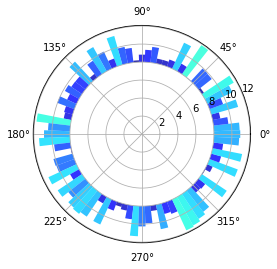

In [44]:
# Here is a plot potentially can use for circular bar chart (Westworld theme)
import numpy as np
import matplotlib.pyplot as plt

N = 80
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

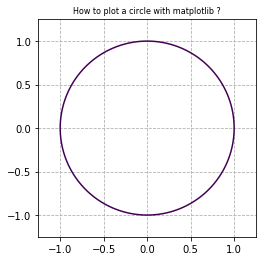

In [45]:
# Here is a basic matplotlib circle
# Potentially use in conjunction with above
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)

X, Y = np.meshgrid(x,y)

F = X**2 + Y**2 - 1.0

fig, ax = plt.subplots()

ax.contour(X,Y,F,[0])

ax.set_aspect(1)

plt.title('How to plot a circle with matplotlib ?', fontsize=8)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')

plt.savefig("plot_circle_matplotlib_03.png", bbox_inches='tight')

plt.show()

In [46]:
import pandas as pd
import pandas_datareader as web
# yahoo data is only up to 5 years old rolling (in 2020 it goes to 2015), google does not work, quandl might be ok
# quandl data is good from 2008 to 2018 March 27
spy_etf = web.DataReader('SPY','yahoo')

In [47]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-04-13 to 2020-04-09
Data columns (total 6 columns):
High         1259 non-null float64
Low          1259 non-null float64
Open         1259 non-null float64
Close        1259 non-null float64
Volume       1259 non-null float64
Adj Close    1259 non-null float64
dtypes: float64(6)
memory usage: 68.9 KB


In [48]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-13,210.630005,209.029999,209.869995,209.089996,74436600.0,189.209213
2015-04-14,209.710007,208.100006,208.850006,209.490005,75099900.0,189.571121
2015-04-15,211.039993,209.949997,210.050003,210.429993,99529300.0,190.421738
2015-04-16,210.979996,209.789993,210.029999,210.369995,68934900.0,190.367477
2015-04-17,209.229996,207.009995,208.940002,207.949997,191113200.0,188.177551


In [49]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2018-03-27')
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
aapl

,Adj. Close
Date,
2010-01-04,27.503268
2010-01-05,27.550818
2010-01-06,27.112585
2010-01-07,27.062465
2010-01-08,27.242385
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


In [50]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2018-03-27')
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
# aapl.to_csv('aapl.csv',sep=',')
aapl

,Adj. Close
Date,
2010-01-04,27.503268
2010-01-05,27.550818
2010-01-06,27.112585
2010-01-07,27.062465
2010-01-08,27.242385
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


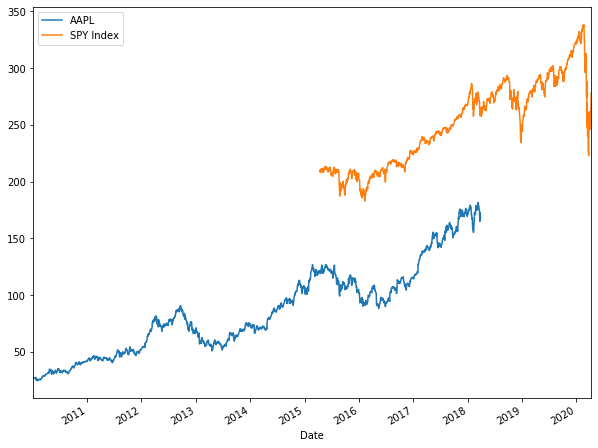

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
aapl['Adj. Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [52]:
# well since yahoo historical does not work, i downloaded the csv
# also some data clean up due to different dates in each file
# spy_etf file removed 8/7/2017 and 11/8/2017 to match AAPL QUANDL
spy_etf = pd.read_csv('SPY_yahoovc.csv',index_col='Date',parse_dates=True)
# reset the date range
spy_etf = spy_etf['2010-01-04':'2018-03-27']
# spy_etf.to_csv('spy.csv',sep=',')
spy_etf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800
...,...,...,...,...,...,...
2018-03-21,270.899994,273.269989,270.190002,270.429993,259.971466,78709600
2018-03-22,267.910004,268.869995,263.359985,263.670013,253.472916,148785900
2018-03-23,264.170013,264.540009,257.829987,258.049988,248.070251,183534800


Text(0, 0.5, 'SPY Index Volume')

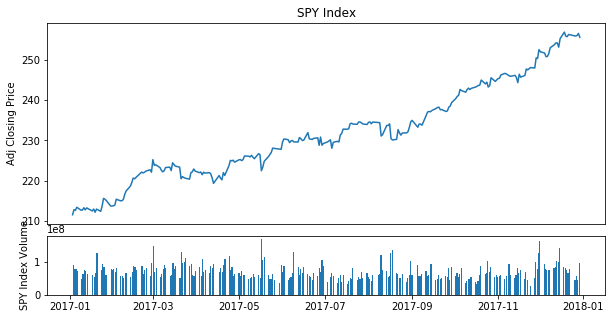

In [53]:
# spy volume vs price
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

# stock to chart
stock = spy_etf.loc['2017-01-01':'2018-01-01']
stock_name = 'SPY Index'

top.plot(stock.index, stock['Adj Close']) #CMT.index gives the dates
top.set_ylabel('Adj Closing Price')
top.axes.get_xaxis().set_visible(False)
top.set_title(stock_name)

bottom.bar(stock.index, stock['Volume'])
bottom.set_ylabel(stock_name + ' Volume') 


<Figure size 720x360 with 0 Axes>

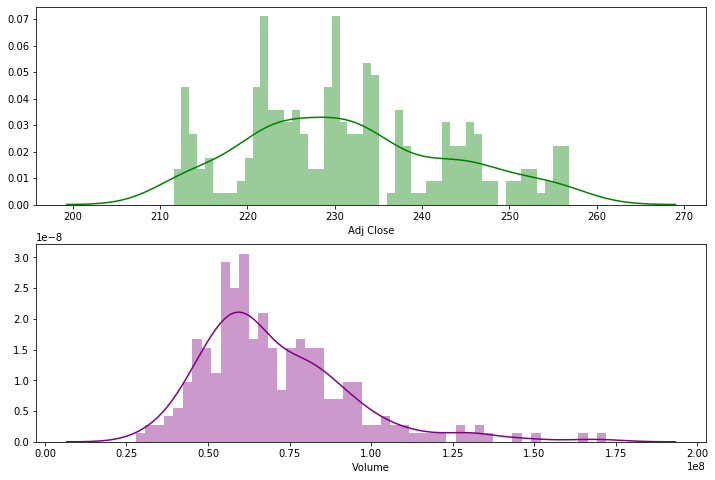

In [54]:
# set the labels
plt.figure(figsize=(10,5))

# Seaborns
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
#sns.countplot(df['batting'], ax=ax[0])
#sns.countplot(df['bowling'], ax=ax[1])
sns.distplot(stock['Adj Close'].dropna(), bins=50, color='green', ax=ax[0],label='hi')
sns.distplot(stock['Volume'].dropna(), bins=50, color='purple', ax=ax[1])

# fig.show()

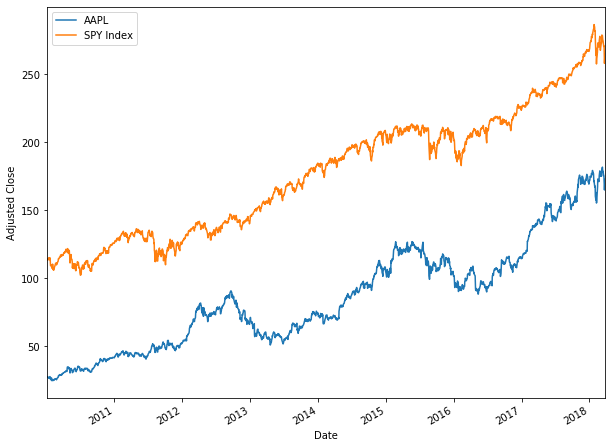

In [55]:
# a good chart after fixing the data
import matplotlib.pyplot as plt
%matplotlib inline
aapl['Adj. Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.ylabel('Adjusted Close')
plt.legend()

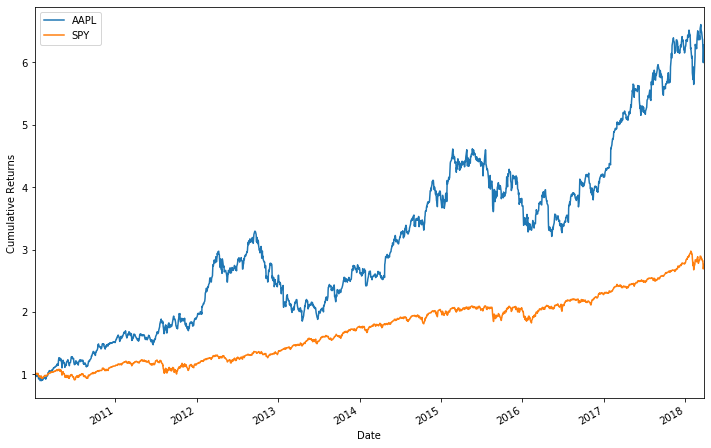

In [56]:
# cumulative plots
# if i invested 1 dollar at the beginning of 2011, how much would i have now
aapl['Cumulative'] = aapl['Adj. Close']/aapl['Adj. Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Adj Close']/spy_etf['Adj Close'].iloc[0]
aapl['Cumulative'].plot(label='AAPL',figsize=(12,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.ylabel('Cumulative Returns')
plt.legend()

array([[1.        , 0.56155142],
       [0.56155142, 1.        ]])

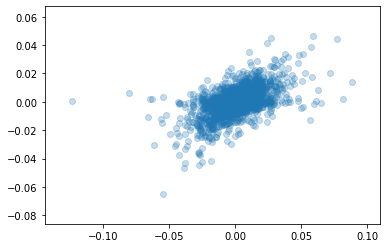

In [57]:
# calc daily returns
aapl['Daily Return'] = aapl['Adj. Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)
# any correlation? the plot does not really show a linear relationship
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25)
# mathematical correlation calculation - row 0 is NaN due to return calc
np.corrcoef(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [58]:
# tuple unpacking and stats package
from scipy import stats

# Linear Regression Run
# Note: cannot pass in first null value
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

print('Beta: ' + str(beta) + ', Alpha: ' + str(alpha) + ', R Square Value: ' + str(r_value))

Beta: 0.32826813373127167, Alpha: 0.00019722528083359497, R Square Value: 0.5615514151021943


In [59]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004222
2010-01-08    0.003328
Name: Daily Return, dtype: float64

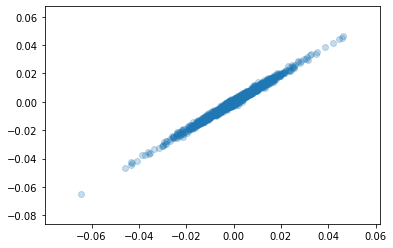

In [60]:
import numpy as np
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))

fake_stock = spy_etf['Daily Return'].iloc[1:] + noise
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=0.25)

In [61]:
# correlation vs cointegration
np.corrcoef(fake_stock,spy_etf['Daily Return'].iloc[1:])

array([[1.        , 0.99437742],
       [0.99437742, 1.        ]])

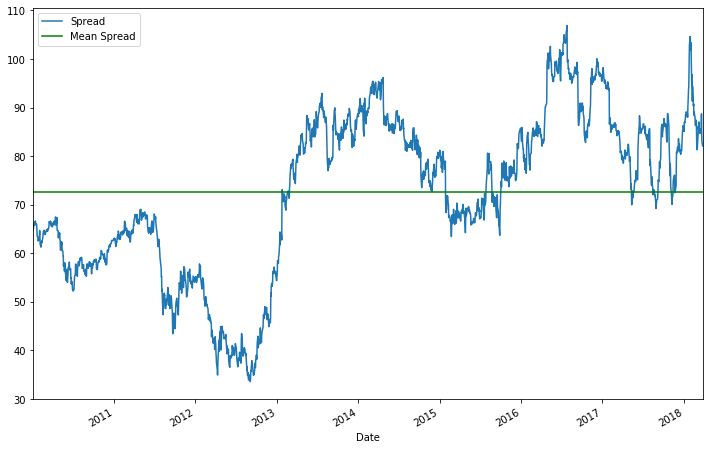

In [62]:
# pairs trading
# trading on the spread
# coke vs pepsi, american airlines vs united airlines

stock1_price = aapl['Adj. Close']
stock2_price = spy_etf['Adj Close']

spread = stock2_price - stock1_price
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(y=spread.mean(),c='g',label='Mean Spread')
plt.legend()


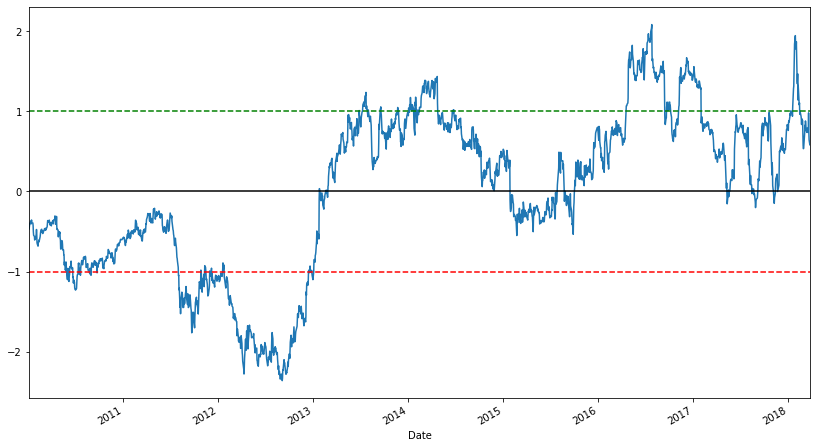

In [63]:
# normalize the stocks using z-score, for trading
def zscore(stocks):
    return (stocks-stocks.mean()) / np.std(stocks)

# plot main idea
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(),color='black')

# simple approach = these two stocks are correlated and the spread should not be signficant
# if it peaks above or below, it should revert back to the mean, so long/short one or the other
# mean should be around zero, so maybe after above or below z-score (long/short the other)
plt.axhline(1.0,color='green',ls='--')
plt.axhline(-1.0,color='red',ls='--')

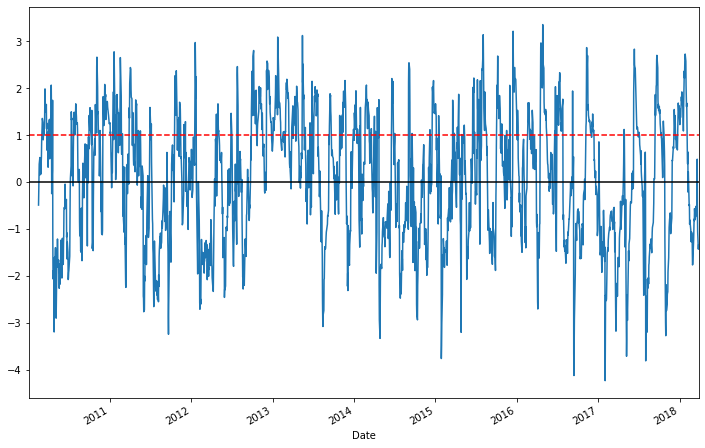

In [64]:
# calculate rolling z score
# rolling method for the algorithm (cannot access future information)
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()

spread_std_30 = spread.rolling(30).std()

spread_zscore_30_1 = (spread_mavg1 - spread_mavg30) / spread_std_30

spread_zscore_30_1.plot(label='Rolling 30D Z Score', figsize=(12,8))
plt.axhline(0, color = 'black')

# arbitrary level for executing trade or Early Warning Indicator
plt.axhline(1.0, color='red',ls='--')

In [65]:
# dataframe with date as index
spread_zscore_30_1

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2018-03-21    0.486999
2018-03-22   -0.634096
2018-03-23   -1.060765
2018-03-26   -1.429288
2018-03-27   -1.342605
Length: 2070, dtype: float64

In [66]:
# get the values without the time index, returns a numpy array
spread_zscore_30_1.values

array([        nan,         nan,         nan, ..., -1.06076475,
       -1.42928793, -1.34260464])

Beta: 0.32826813373127167, Alpha: 0.00019722528083359497, R Square Value: 0.5615514151021943


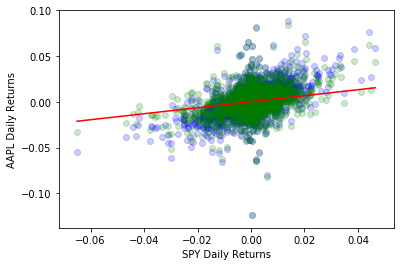

In [67]:
# Simple Beta Hedge Part 1
# cancels out the market effect and focus on alpha only
# hedge against beta for alpha (Long AAPL, short SPY)

# calc daily returns
aapl['Daily Return'] = aapl['Adj. Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

# plot a linear line with an x axis constraint
min_spy = spy_etf['Daily Return'].iloc[1:].min() # spread_zscore_30_1.index.min() # if you want dates
max_spy = spy_etf['Daily Return'].iloc[1:].max() # spread_zscore_30_1.index.max()

# build x axis with 100 points in between two points on x axis
some_line = np.linspace(min_spy,max_spy,1000)

# regression output
# tuple unpacking and stats package
from scipy import stats

# Linear Regression Run
# Note: cannot pass in first null value
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])
print('Beta: ' + str(beta) + ', Alpha: ' + str(alpha) + ', R Square Value: ' + str(r_value))

beta = beta
alpha = alpha

# build y axis using y = mx + b
y = some_line*beta + alpha

# plot it
plt.plot(some_line,y,'r')

# attach scatter
plt.scatter(spy_etf['Daily Return'],aapl['Daily Return'],color='b',alpha=0.2)
plt.xlabel('SPY Daily Returns')
plt.ylabel('AAPL Daily Returns')

# mathematical correlation calculation - row 0 is NaN due to return calc
np.corrcoef(spy_etf['Daily Return'].iloc[1:],aapl['Daily Return'].iloc[1:])

# calculate hedge 
bench_ret = spy_etf['Daily Return'].iloc[1:]
asset_ret = aapl['Daily Return'].iloc[1:]
hedged = -1*(beta*bench_ret) + asset_ret
plt.scatter(bench_ret,hedged,color='g',alpha=0.2)

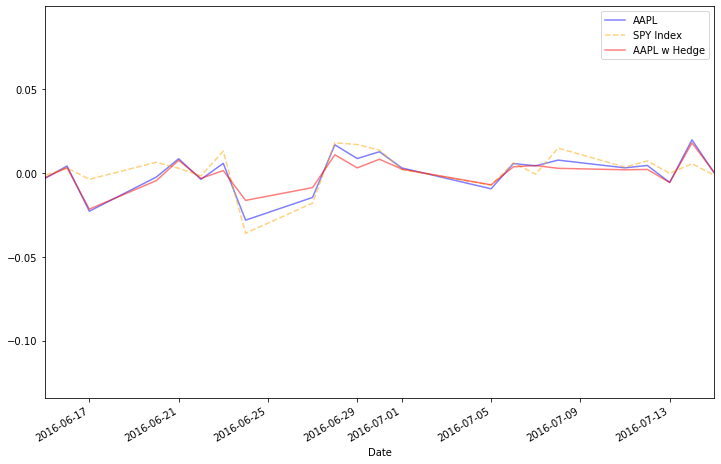

In [68]:
# Simple beta hedge Part 2
asset_ret.plot(figsize=(12,8), alpha = 0.5, label='AAPL',color='blue')
bench_ret.plot(alpha = 0.5,label='SPY Index', color='orange',ls='--')
hedged.plot(alpha = 0.5, label='AAPL w Hedge', color='red')
plt.xlim(['2016-06-15','2016-07-15'])
plt.legend()

In [69]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

def alpha_beta(benchmark_ret, stock):
    benchmark = sm.add_constant(benchmark_ret)
    model = regression.linear_model.OLS(stock,benchmark).fit()
    return model.params[0],model.params[1]

In [70]:
# 2016 model, then apply to 2017
start = '2016-01-01'
end = '2017-01-01'
asset_ret2016 = aapl['Daily Return'].loc[start:end]
benchmark_ret2016 = spy_etf['Daily Return'].loc[start:end]

# 2017 values for later
start = '2017-01-01'
end = '2018-01-01'
asset_ret2017 = aapl['Daily Return'].loc[start:end]
benchmark_ret2017 = spy_etf['Daily Return'].loc[start:end]


# strip time stamp info
assetret_values = asset_ret2016.values
benchmarkret_values = benchmark_ret2016.values

alpha2016,beta2016 = alpha_beta(benchmarkret_values,assetret_values)

In [71]:
print('2016 VALUES')
print(''.join(['Alpha: ', str(alpha2016),'\nBeta: ',str(beta2016)]))

2016 VALUES
Alpha: 8.598883005221636e-05
Beta: 1.010684382966748


In [72]:
# calc hedge portfolio
portfolio = -1*beta2016*benchmark_ret2016 + asset_ret2016
alpha,beta = alpha_beta(benchmark_ret2016.values, portfolio.values)

In [73]:
print('HEDGE PORTFOLIO')
print(''.join(['Alpha: ', str(alpha),'\nBeta: ',str(beta)]))

HEDGE PORTFOLIO
Alpha: 8.598883005221634e-05
Beta: -1.734723475976807e-17


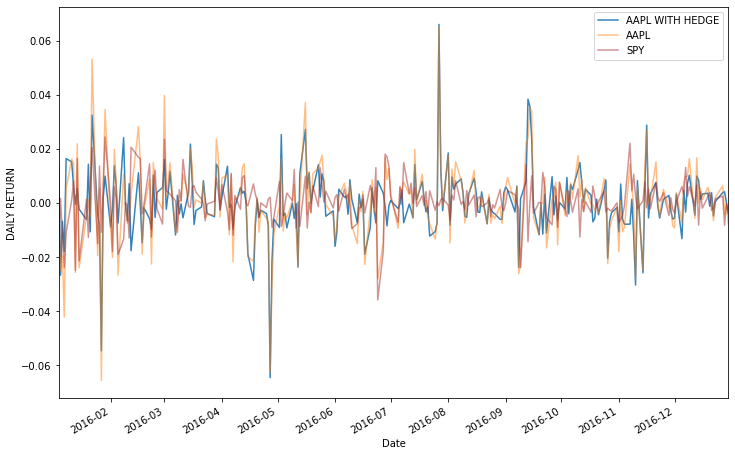

In [74]:
portfolio.plot(alpha=0.9,label='AAPL WITH HEDGE',figsize=(12,8))
asset_ret2016.plot(alpha=0.5,label='AAPL')
benchmark_ret2016.plot(alpha=0.5,color='brown',label='SPY')
plt.ylabel('DAILY RETURN')
plt.legend()

In [75]:
# Analyze hedged vs unhedged mean performance
print('AVERAGES')
print('Portfolio Mean = ' + str(portfolio.mean()*100))
print('AAPL Mean = ' + str(asset_ret2016.mean()*100))
# here we reduce overall average return (partly because apple was a huge part of the market)

AVERAGES
Portfolio Mean = 0.008598883005221597
AAPL Mean = 0.057467431821778006


In [76]:
# Analyze volatility reduction performance
print('STD DEV')
print('Portfolio Std = ' + str(portfolio.std()*100))
print('AAPL Std = ' + str(asset_ret2016.std()*100))
# here we reduce overall portfolio volatility, but probably not good given the pain to return 
# (partly because apple was a huge part of the market)

STD DEV
Portfolio Std = 1.212351853776388
AAPL Std = 1.4701415298870328


In [77]:
# Apply 2016 model on 2017 to see how it performs
portfolio = -1*beta2016*benchmark_ret2017 + asset_ret2017
alpha,beta = alpha_beta(benchmark_ret2017.values, portfolio.values)

In [78]:
alpha

0.0005671039725827036

In [79]:
beta

# here beta is no longer zero because Apple grew larger in 2017 and became more of the index, 
# so the 2016 model does not do a good hedge as you can see the beta has changed

0.3286517086163735

In [80]:
portfolio.mean()*100

0.08294396545962295

In [81]:
asset_ret2017.mean()*100

0.1636186036722878

In [82]:
portfolio.std()

0.009736007974408212

In [83]:
asset_ret2017.std()

0.011193980804769018

In [84]:
# here we gave up 0.08% in return for 10% less volatility

In [85]:
# Pyfolio
import pyfolio as pf
# UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
import matplotlib.pyplot as plt
import empyrical


C:\Users\V\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


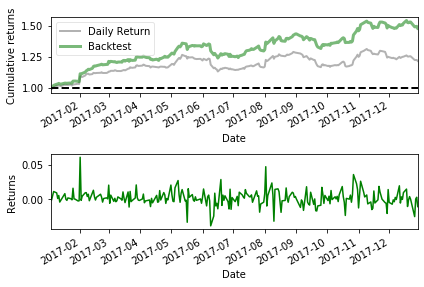

In [86]:
# pf.plotting.

# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(asset_ret2017, portfolio)

# Non-Cumulative Returns (Daily)
plt.subplot(2,1,2)
pf.plotting.plot_returns(asset_ret2017)
plt.tight_layout()

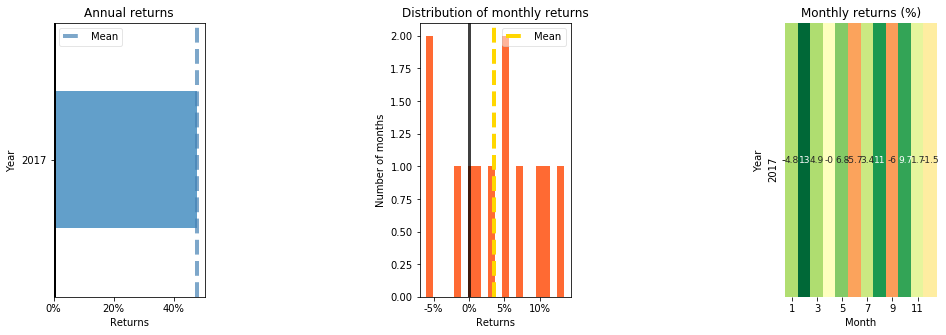

In [87]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(asset_ret2017)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(asset_ret2017)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(asset_ret2017)
plt.tight_layout()
fig.set_size_inches(15,5)

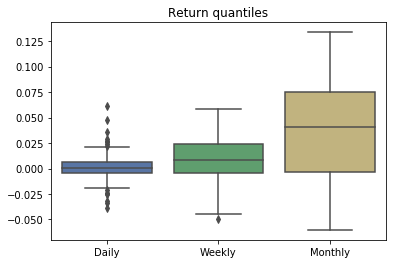

In [88]:
pf.plot_return_quantiles(asset_ret2017);

C:\Users\V\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


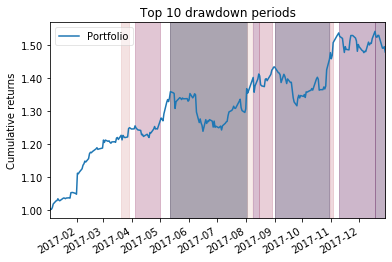

In [89]:
pf.plot_drawdown_periods(asset_ret2017);

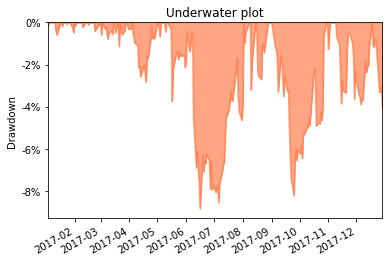

In [90]:
# Underwater Plot
# Initial peak of $750,000 is used in the MDD calc. Interim peak of $600,000 is not used, since does not represent a new high
pf.plot_drawdown_underwater(asset_ret2017);